# Locally Weighted Regression

1) Read and Normalise the Dataset

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

$\theta = (X^TWX)^{-1}.X^TWY$

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [3]:
x = dfx.values
y = dfy.values

In [4]:
print(x.shape, y.shape)

(99, 1) (99, 1)


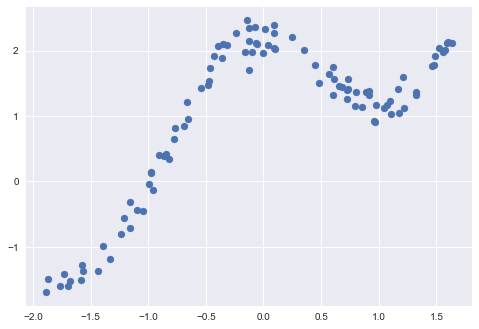

In [5]:
# Normalise the data

x = (x - x.mean())/x.std()

# Visualise
plt.style.use('seaborn')
plt.scatter(x, y)
plt.show()

# Find out W ($M * M$ diagonal matrix)

$W_i = e^\frac{-(X_i - X)^2}{2\tau^2}$ 

We know:

$(X_i - X)^2 = (X_i - X).(X_i - X)^T$

In [6]:
def getW(queryPoint,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = queryPoint
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W


In [7]:
X = np.mat(x)
Y = np.mat(y)
M = X.shape[0]

W = getW(-1, X, 100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


# Make Predictions

In [8]:
def predict(X,Y,queryX,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((ones, X))
    
    qx = np.mat([1, queryX])
    
    W = getW(qx, X_, tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [9]:
theta,pred = predict(X,Y,1.0,1.0)

In [10]:
print(theta)
print(pred)

[[1.45348191]
 [0.14069504]]
[[1.59417694]]


# Visualise Predictions, Analyse the Effect of Tau

In [11]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

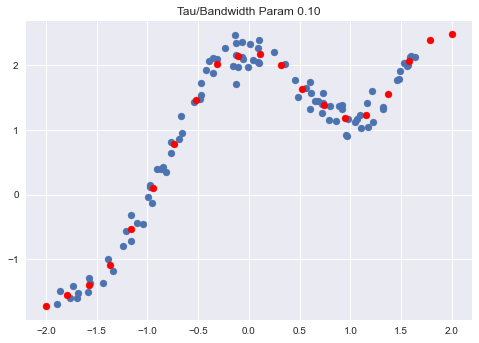

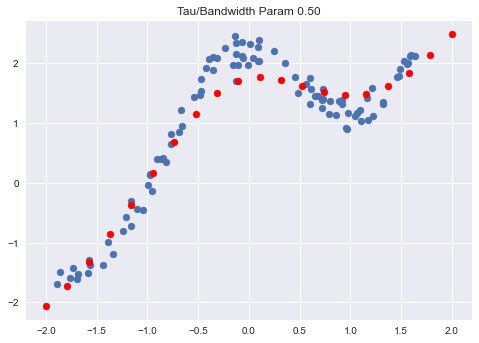

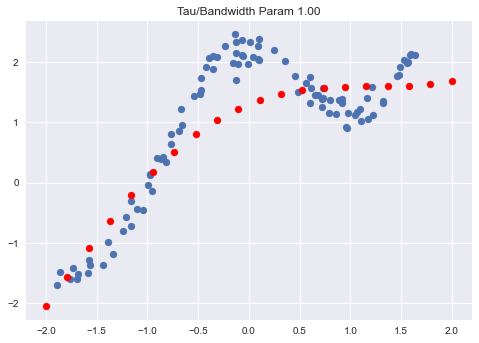

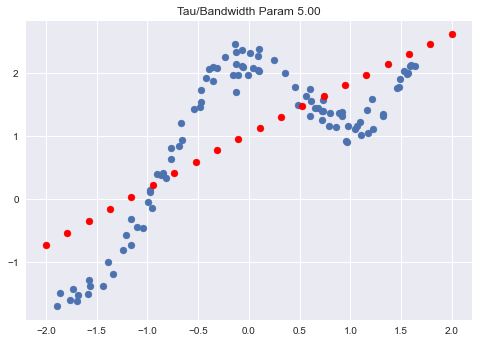

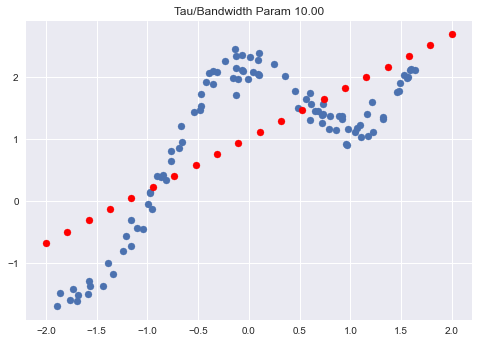

In [12]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)